## Real-State House Price Predictor


In [1]:
 import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,501.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.287178,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.704827,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.888000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
500    0
501    0
502    0
503    0
504    0
Name: CHAS, Length: 505, dtype: int64

In [7]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [8]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [9]:
housing['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
30.0       6
45.0       6
90.0       5
33.0       4
95.0       4
60.0       4
21.0       4
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
75.0       3
35.0       3
82.5       2
85.0       2
17.5       1
100.0      1
Name: ZN, dtype: int64

In [10]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [13]:
# housing.hist(bins=50, figsize=(20,15))

In [14]:
# housing.hist(bins=50, figsize=(75,50))

## Train-Test Splitting

In [15]:
# for learning purpose only
 #import numpy as np
#  def split_train_test(data, test_ratio):
#     shuffled = np.random.permutation(len(data))
#     np.random.seed(42)
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
# train_set, test_set  = split_train_test(housing, 0.2)

In [17]:
# print(f"Row in train set: {len(train_set)}\nRow in test set: {len(test_set)}\n")

In [18]:
# this type of sampling is wrong because if training data of CHAS contains 
# only 0 then our model not able to track CHAS = 1 So to avoid this type 
# of mistake we have to use stratified sampling

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Row in train set: {len(train_set)}\nRow in test set: {len(test_set)}\n")


Row in train set: 404
Row in test set: 101



In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.255212,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292,22.345792
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.690918,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418,9.157996
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500,16.575000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.183500,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000,21.050000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.608500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
housing = strat_train_set.copy()

## Looking for Correlation

In [22]:
# Correlation means relation between the values
# Corrrelation value varies from -1 to 1
# -1 means strong negative Correlation
# 1 means strong positive Correlation

In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.659947
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

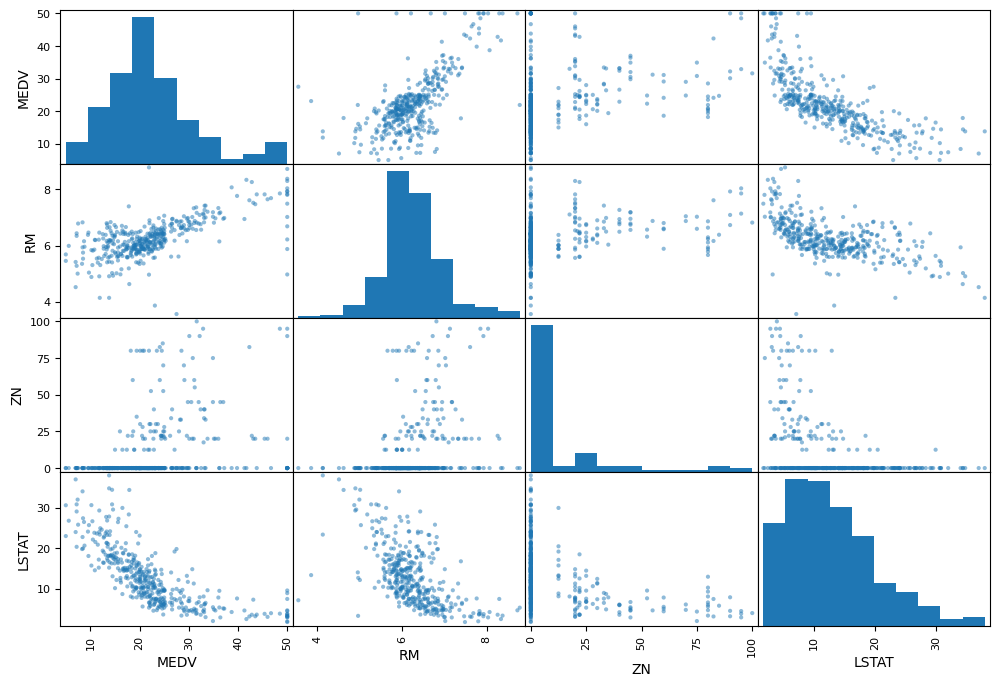

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize =(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

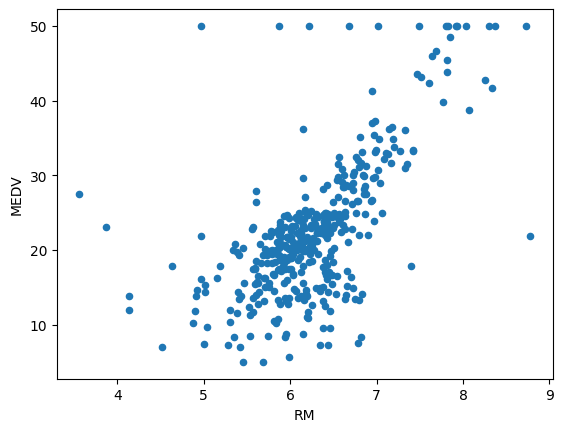

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV")

## Trying out Attribute combinations


In [26]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.659947
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.509972
LSTAT     -0.739129
Name: MEDV, dtype: float64

In [29]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_label = strat_train_set["MEDV"].copy()

## Missing Attributes

In [30]:
#  To take care of missing attributes, you have three option
#     1. Get rid of the missing data points
#     2. Get rid of the whole attributes
#     3. Set the value to some value(0,mean or median) 

In [31]:
 a = housing.dropna(subset=["RM"]) #option 1
# original housing data frame is remain unchange
 a.shape

(400, 13)

In [32]:
housing.drop(["RM"],axis = 1) #option 2
# original housing data frame is remain unchange

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.03548,80.0,3.64,0,0.392,19.1,9.2203,1,315,16.4,395.18,9.25
348,0.02899,40.0,1.25,0,0.429,34.5,8.7921,1,335,19.7,389.85,5.89
476,15.02340,0.0,18.10,0,0.614,97.3,2.1007,24,666,20.2,349.48,24.91
321,0.35114,0.0,7.38,0,0.493,49.9,4.7211,5,287,19.6,396.90,7.70
326,0.24103,0.0,7.38,0,0.493,43.7,5.4159,5,287,19.6,396.90,12.79
...,...,...,...,...,...,...,...,...,...,...,...,...
154,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,8.79212,0.0,18.10,0,0.584,70.6,2.0635,24,666,20.2,3.65,17.16
98,0.06860,0.0,2.89,0,0.445,62.5,3.4952,2,276,18.0,396.90,6.19
455,4.66883,0.0,18.10,0,0.713,87.9,2.5806,24,666,20.2,10.48,19.01


In [33]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.255212,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.690918,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.183500,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.608500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
median = housing["RM"].median()

In [35]:
median

6.1835

In [36]:
housing["RM"].fillna(median) #option 3
# original housing data frame is remain unchange

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1835e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.254502,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.687517,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.876750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.183500,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily, three type of objects
1. Estimators - It estimates some parameter based on a dataset. Eg imputer. 
   It has a fit method and transform method. Fit method - Fits the dataset 
   and calculates internal parameters.
2. Transformers - Transform method takes input and return output based on 
   the learning from fit(). It also has a convenience function called 
   fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor. fit() and 
   predictor() are two common functions. It also gives score() functions which
   will evaluate the predictions. 

## Feature Scaling

Primarily, two types of features scaling methods:
1. Min-max scaling (Normalization)
   (value - min)/(max - min)
   Sklearn provides a class called MinMaxScaler for this.
   
2. Standardization
   (value - mean)/std
   Sklearn provides a class called StandardScalerr for this.

## Creating Pipe Line


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #   ....... add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr


array([[-0.44241248,  3.18716752, -1.12581552, ..., -0.99428207,
         0.43852974, -0.49833679],
       [-0.44320015,  1.36098896, -1.47680838, ...,  0.56613801,
         0.38242047, -0.96561983],
       [ 1.3766227 , -0.46518961,  0.99776471, ...,  0.80256529,
        -0.04255723,  1.67953595],
       ...,
       [-0.43839281, -0.46518961, -1.23595972, ..., -0.23771476,
         0.4566363 , -0.92389813],
       [ 0.11992217, -0.46518961,  0.99776471, ...,  0.80256529,
        -3.61123302,  0.85900919],
       [-0.44118424, -0.46518961,  0.37948858, ..., -0.99428207,
         0.41347532,  0.09411135]])

## Selecting a desired model for Real Estate

In [45]:
housing_num_tr.shape

(404, 13)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]    

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([20.847, 27.407, 12.515, 21.126, 21.776])

In [50]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label,housing_predictions)
rmse = np.sqrt(mse)

In [52]:
mse

1.4854761707920805

In [53]:
rmse

1.218801120278481

# Using better evaluation technique - cross Validation

In [54]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring="neg_mean_squared_error", cv= 10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([3.27388848, 2.61981391, 5.27593708, 2.79619859, 2.78197795,
       2.55937025, 2.61955262, 2.85513552, 2.08627133, 4.78061395])

In [56]:
 def print_scores(scores):
        print("Scores: ",scores)
        print("Mean: ",scores.mean())
        print("standard deviation: ",scores.std())

In [57]:
print_scores(rmse_scores)

Scores:  [3.27388848 2.61981391 5.27593708 2.79619859 2.78197795 2.55937025
 2.61955262 2.85513552 2.08627133 4.78061395]
Mean:  3.1648759680939915
standard deviation:  0.9788789689483658


# Result of LinearRegression model

Scores:  [3.94952915 3.7959542  5.41137014 3.77213791 4.21248145 3.55900267
 3.89204317 3.66415065 3.51838031 5.01811718]
Mean:  4.079316682507644
standard deviation:  0.604793686983272

# Result of Decision Tree model

Scores:  [6.21650597 4.81560253 5.01667908 3.71837645 5.37974743 3.84228256
 5.34416021 3.49290365 4.32696444 6.95704362]
Mean:  4.9110265934281445
standard deviation:  1.0599463987539728

# Result of RandomForestRegressor model

Scores:  [3.32350181 2.44427862 5.11470732 2.80013044 2.58799059 2.52042528
 3.12647857 2.84775658 2.01161757 4.36631376]
Mean:  3.11432005373675
standard deviation:  0.8987410909849581

# Saving the Model

In [59]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

# Testing the data model on test data

In [60]:
X_test = strat_test_set.drop("MEDV",axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

3.4296396817354795

In [62]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.55121782, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])